<a href="https://colab.research.google.com/github/Aj-5511/ANJI5511/blob/main/face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow
!pip install opencv-python
!pip install --upgrade keras tensorflow
!pip install --upgrade opencv-python

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np
print(cv2.__version__)

4.9.0


In [7]:
train_data_gen = ImageDataGenerator()
train_generator = train_data_gen.flow_from_directory('/content/drive/MyDrive/FER2013/TRAIN',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

Found 21360 images belonging to 5 classes.


In [8]:
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_directory(
        '/content/drive/MyDrive/FER2013/TEST',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 6200 images belonging to 5 classes.


In [9]:
emotion_model = Sequential()

emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                         input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.20))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.20))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(5, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
                               decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                      metrics=['accuracy'])
#print(emotion_model.output_shape)
#print(validation_generator.labels.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [10]:
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=21360 // 1280,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=6200 // 1280)

16/16 [==============================] - 502s 32s/step - loss: 8.3017 - accuracy: 0.2578 - val_loss: 1.6089 - val_accuracy: 0.2969


In [11]:
emotion_model.evaluate(validation_generator)

97/97 [==============================] - 1699s 18s/step - loss: 1.6085 - accuracy: 0.2915


[1.6085058450698853, 0.2914516031742096]

In [12]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']


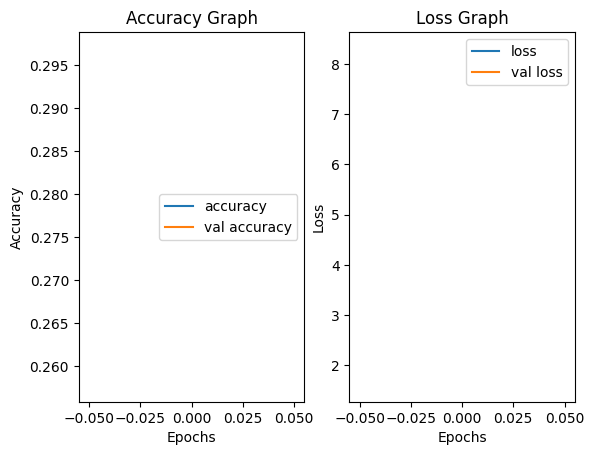

In [13]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

In [15]:
emotion_dict = {0: "Angry",1: "Happy", 2: "Neutral", 3: "Sad", 4: "Fear"}

In [16]:
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
